## Part 1 Data Exploration
1. The dataset contains 20,491 entries with 2 features: text reviews and ratings from 1 to 5.
By observing the distribution of ratings using a bar plot, we found that:
Ratings of 5 have nearly 9,000 entries, making up almost 45% of the total.
Ratings of 4 have nearly 6,000 entries, accounting for about 30%.
Ratings of 3 are around 2,000 entries, approximately 10%.
Ratings of 1 and 2 each have fewer than 2,000 entries, both below 10%, with rating 1 being the least frequent.
2. A new feature named length was created to record the number of words in the text reviews. A bar plot shows that most reviews have fewer than 3,000 words, with only 297 reviews having 3,000 or more words. These were considered outliers and removed from the dataset.

3. By using strip plots and distribution plots to observe the relationship between ratings and review lengths, we found that higher ratings are associated with longer reviews.

4. Without any restrictions on length:
Reviews with a rating of 1 are less than 7k words.
Reviews with a rating of 2 are less than 8k words.
Reviews with a rating of 3 are mostly below 9.5k words, with one outlier close to 14k words.
Reviews with a rating of 4 are below 10k words.
Reviews with a rating of 5 are below 13k words.
Restricting the length to less than 3k words:
Regardless of the rating, most review lengths are concentrated between 0-1500 words.
It is challenging to predict the rating based solely on the review length, indicating the need for keyword analysis.

## Part 2 Text Preprocessing
1. Change the ratings from 1-5 to three categories: 1-2 as Bad, 3 as Neutral, and 4-5 as Good.
2. Clean the data in three steps:
Remove punctuation from the reviews and convert all characters to lowercase.
Remove stopwords from the reviews, e.g., "the," "is," "and."
Perform lemmatization on the reviews. Lemmatization links similar meaning words as one word, e.g., "walked," "walk," "walks," "walking" -> "walk."
3. After cleaning the reviews, we removed 8.7% of redundant data (Length decreased from 13.55 million to 12.364 million)


## Part 3 Next Steps
1. Create word clouds for different rating categories to observe the most frequently occurring words in each type of review, hoping to gain some insights from these words.
2. Use the LDA (Latent Dirichlet Allocation) model to create topics for different types of reviews. By examining the topics under different types of reviews, we can understand the reasons for low ratings and use this information to improve in the future. At the same time, we can check the topics under good reviews to maintain these positive aspects in the future.

### Unstructured Data: Hotel Reviews Information Retrieval

### Business Goal:
### Our Client runs chained hotels in US and they now are able to collect feedback/review from customers. They wanna ultilize the reviews to improve customer experience by identifying underlying pain points from text, which can be achived by information retrieval
###

In [ ]:
#!pip install "pandas<2.0.0"
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
import nltk
nltk.download('punkt')  # Download the required tokenization models
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### Data Exploration

In [ ]:
df = pd.read_csv('hotel_reviews.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Data Exploration/ Visualization

#### rating column

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Rating Distribution Across Dataset')

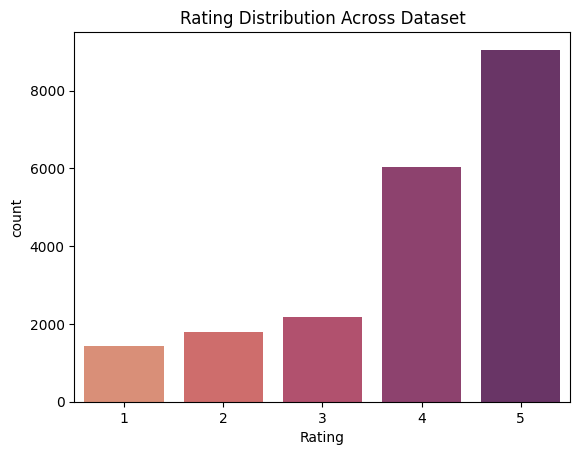

In [ ]:
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

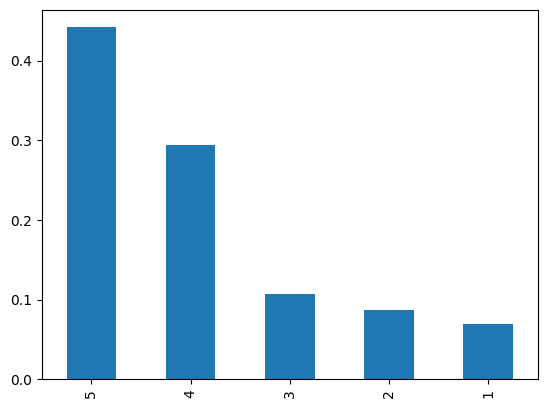

In [ ]:
import matplotlib
rating = df.Rating.value_counts()/df.shape[0]
rating.plot.bar()

#### Create length of word in sentence

In [ ]:
df['Length'] = df['Review'].apply(len)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


#### visualize

### Explore length of words and rating's relationship

### There are 297 out of 20491 reviews which have length bigger than or equal to 3000. We considered them as outliers and remove them.


In [ ]:
df[df['Length'] >= 3000].shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(297, 3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


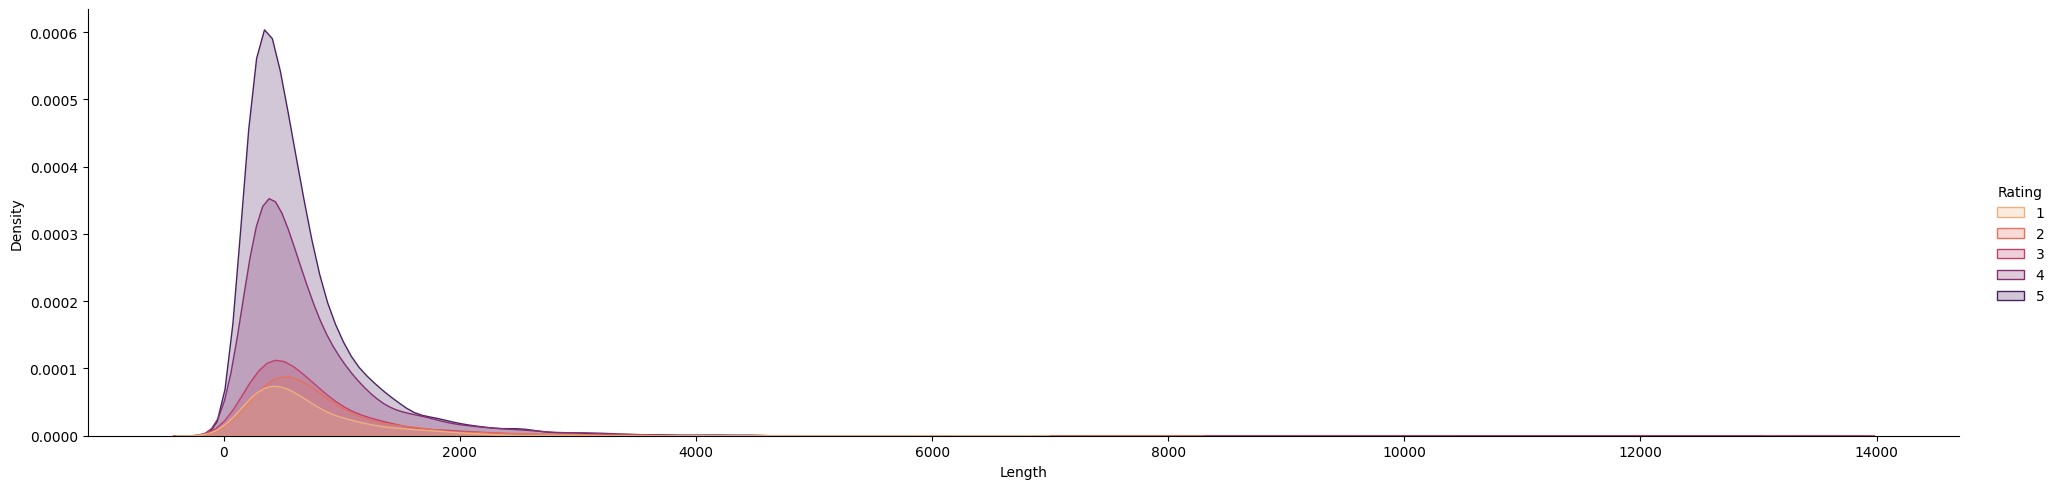

In [ ]:
sns.displot(data=df, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

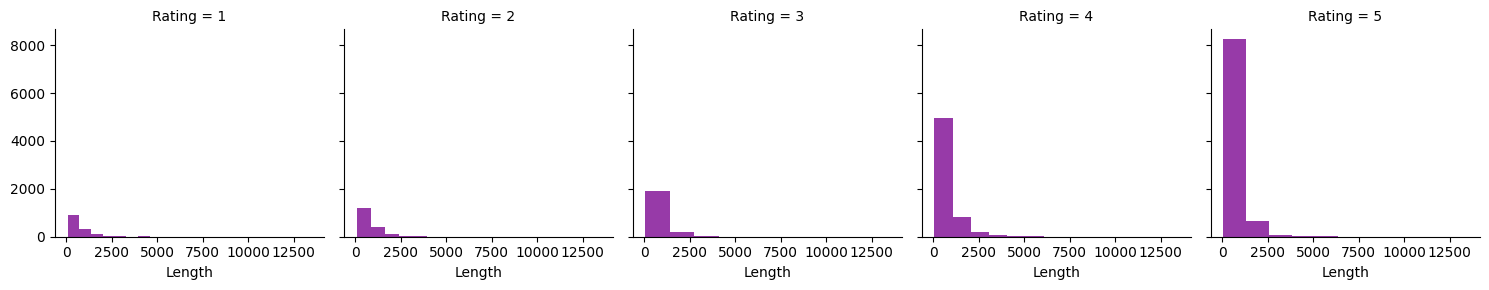

In [ ]:
g = sns.FacetGrid(data=df, col='Rating')
g.map(plt.hist, 'Length', color='#973aa8')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-bfb0fb9b3000>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


<Axes: xlabel='Rating', ylabel='Length'>

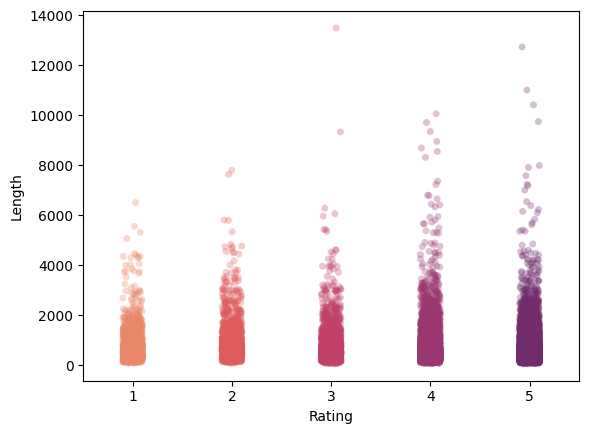

In [ ]:
sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

In [ ]:
df_new = df[df['Length'] < 3000].copy()
df_new

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281
...,...,...,...
20485,not impressed unfriendly staff checked asked h...,2,616
20486,"best kept secret 3rd time staying charm, not 5...",5,733
20487,great location price view hotel great quick pl...,4,306
20488,"ok just looks nice modern outside, desk staff ...",2,443


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: ylabel='Frequency'>

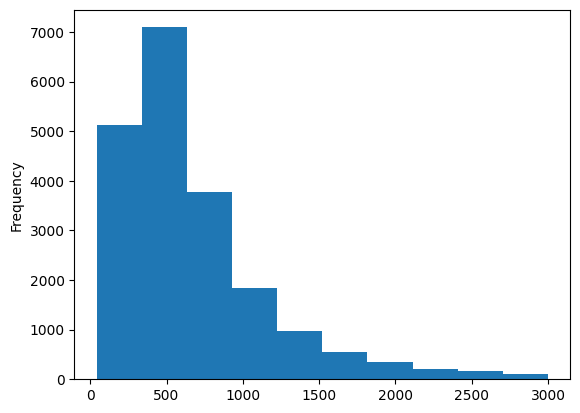

In [ ]:
df_new.Length.plot.hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


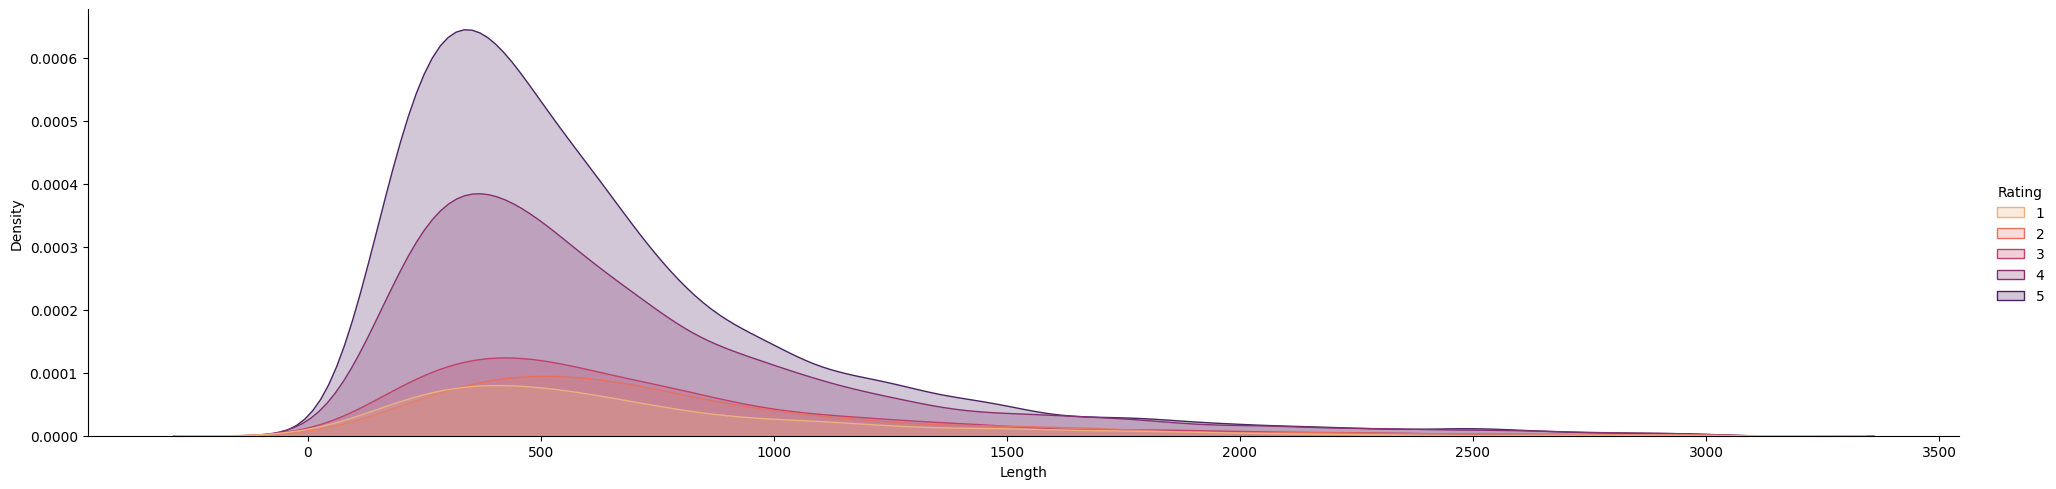

In [ ]:
sns.displot(data=df_new, x='Length', hue='Rating', palette='flare', kind='kde', fill=True, aspect=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.f

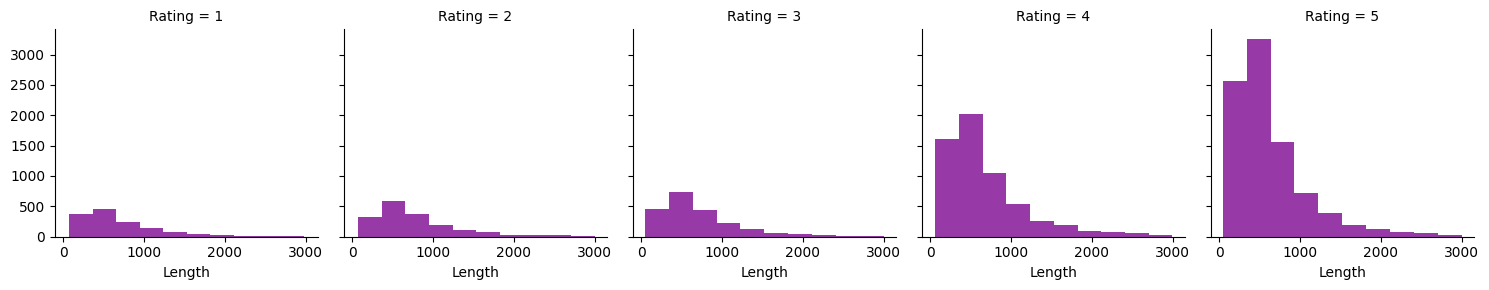

In [ ]:
g = sns.FacetGrid(data=df_new, col='Rating')
g.map(plt.hist, 'Length', color='#973aa8')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-539e179288e4>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_new, x='Rating', y='Length', palette='flare', alpha=0.3)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


<Axes: xlabel='Rating', ylabel='Length'>

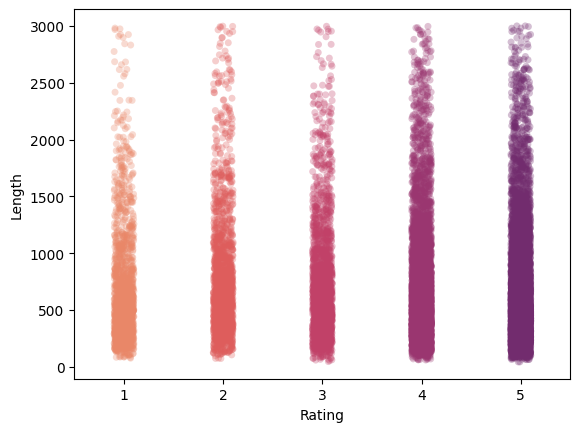

In [ ]:
sns.stripplot(data=df_new, x='Rating', y='Length', palette='flare', alpha=0.3)

### Conclusion: Review lengths are all within the range of 0 and 2000, so it's hard to predict the final review score based on review length. 

### Text Preprocessing

#### convert numerical rating into categories

- rating > 3: good
- rating = 3: neutral
- rating < 3: bad

In [ ]:
def rating(score):
    if score > 3:
        return 'Good'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Bad'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_new['Rating'] = df_new['Rating'].apply(rating)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### keep track of the total length of text

In [ ]:
length = df_new['Length'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Stemming vs Lemmatization

In [ ]:
from nltk.corpus import wordnet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
# print('Original:')
# print(df['Review'][0])
# print()

# sentence = []
# for word in df['Review'][0].split():
#     stemmer = SnowballStemmer('english')
#     sentence.append(stemmer.stem(word))
# print('Stemming:')
# print(' '.join(sentence))
# print()

# sentence = []
# for word in df['Review'][0].split():
#     lemmatizer = WordNetLemmatizer()
#     sentence.append(lemmatizer.lemmatize(word, 'v'))
# print('Lemmatization:')
# print(' '.join(sentence))

### Explore difference between stemming and lemmentation
Stemming chops off the ends of words to remove prefixes and suffixes, in the purpose of producing base form of the words. It sometimes may produce non-dictionary words like 'expens','arriv'. Lemmatization is a more sophisticated process that involves resolving words to their dictionary form or lemma, which is linguistically accurate and contextually valid.

In [ ]:
# choose lemmatization to clean up sentences
def cleaning(text):
    #remove punctuations and uppercase

    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()

    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]
    clean_text = [word for word in clean_text if word.encode('utf-8','ignore').decode("utf-8")]

    #lemmatize the word
    sentence = []
    for word in clean_text:
        if word == 'nt':
            word = 'not'
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))



    return ' '.join(sentence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_new['Review'] = df_new['Review'].apply(cleaning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### convert all reviews into lower case

In [ ]:
df_new['Review'] = df_new['Review'].apply(lambda x: x.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_new['Length_new'] = df_new['Review'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

df_new['Length_new'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12381224

In [ ]:
df_new[df_new['Rating'] == 'Bad']['Review'][1504]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'horrific overrate hotel disappoint hotel second walk property things progress bad horrible checkin excruciatingly slow reception employee pleasant not know say wait 10 minutes room show room map look really far away ask closer say none available say compensate distance give special luxury room whisper room go 100000 night ha joke turn walk outside room connect main build 100 degrees outside bell hop available help numerous suitcases sweat time 1520 minutes later get room room joke tiny poor decor way worth 1k night let 100 trudge reception desk explain dissatisfaction esp distance lo behold room suddenly available bite walk manageable nightmare start second day discover late night closet flood clothe shelve hangers soak midnight manager say send pick clothe dry explain husband not clothe leave closet get laundry items miss advise desk manager say follow 30 minutes hour later go desk chat joke employee not begin check hour later say not know happen laundry manager morning explain manag

### Other cleaning

### Reading guidlines

* https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0
* https://medium.com/towards-data-science/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* https://medium.com/towards-data-science/topic-modelling-in-python-with-nltk-and-gensim-4ef03213cd21

## Part 1 WordCloud
1. Created a word cloud for negative reviews and found some non-English words (nt) among the commonly used words. Further cleaned the data by removing all non-English words.
2. Created the word cloud again and found that commonly occurring words include hotel, room, night, service, stay...

## Part 2 LDA baseline Model & N - Gram
1. Created a word-level LDA model with three different topics, each composed of five keywords. Each keyword has a certain weight in the topic. Found that commonly occurring words in the topics like "hotel," "resort," and "stay" were not helpful in identifying pain points, so these words were added to the stopword list and further removed.
2. Reran the word-level LDA model, and the resulting three topics were:
"room, tell, book, check, night"
"room, good, bathroom, location, small"
"food, room, beach, time, service".
Among these, there are few qualitative words, with "small" being the only negative one. The insight gained is that consumers frequently mention "room," "bathroom," "location," and "service," which need further attention.
3. Ran a phrase-level LDA model using 3-Gram on the reviews. The resulting three topics revealed pain points: "poor customer service" and "take long time" were frequently mentioned phrases that can be areas for improvement to enhance the customer experience. Positive aspects include "king size bed," "non-smoking room," "staff friendly helpful," and "harbour view room," which should be maintained in the future.

## Part 3 LDA & Keyword Extraction
1. Rake & LDA: Using the Rake technique, the maximum length of keywords in each Rake review was 4. Some Rake reviews had zero keywords. After running the LDA model, three topics were generated, each with ten one-word terms. Many qualitative words were added, for example:

- Positive: nice, better, good, great, best, recommend, beautiful
- Negative: disappoint, horrible, avoid, worst, bad

However, it was unclear what specifically was considered good or bad, with only "attitude" being identified. The insight gained is that consumers frequently mentioned "star" and "staff," indicating these areas need attention.
2. KeyBert: The running time was too long, so it was abandoned.

3. Yake & LDA: Using the Yake technique, keywords in each Yake review were tri-grams (3-word phrases). After running the LDA model, six topics were generated, each with five 3-word phrases. The number of general words increased. Pain points identified included: poor customer service, bedroom bathroom small, door lock break, smell like mold. Positive aspects included: ocean view room, king size bed, minute walk nearest, staff friendly helpful, non-smoke room, good location close, staff polite helpful. Improvement: Pain points and positive aspects were more specific.

4. TextRank & LDA: Using the TextRank technique, the LDA model generated three topics, each with ten one-word terms. High-frequency words in the three topics included room, service, staff, time, day. The insight gained is the need to focus on room, service, staff, time, and day.

## Part 4 TF-IDF & K-Means

Performed TF-IDF on the text and applied a K-Means model to the resulting matrix to identify clusters. By analyzing the SSE plot, the number of clusters (topics) was determined to be 8. The potential pain points found in the topics include:
   
rude, bad, manager, book, park, terrible, customer, staff, room, service

price, good, location, bathroom, poor, staff, disappoint, small, room, star

dirty, park, place, water, like, bathroom, bed, shower, night, room

In [ ]:
#!pip install wordcloud
#!pip install rake-nltk
#!pip install keybert
# from keybert import KeyBERT
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred

## Wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


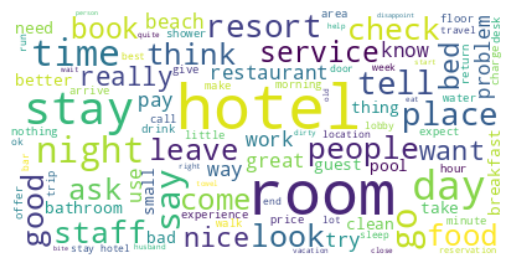

In [ ]:
text = " ".join(review for review in df_new[df_new['Rating'] == 'Bad']['Review'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


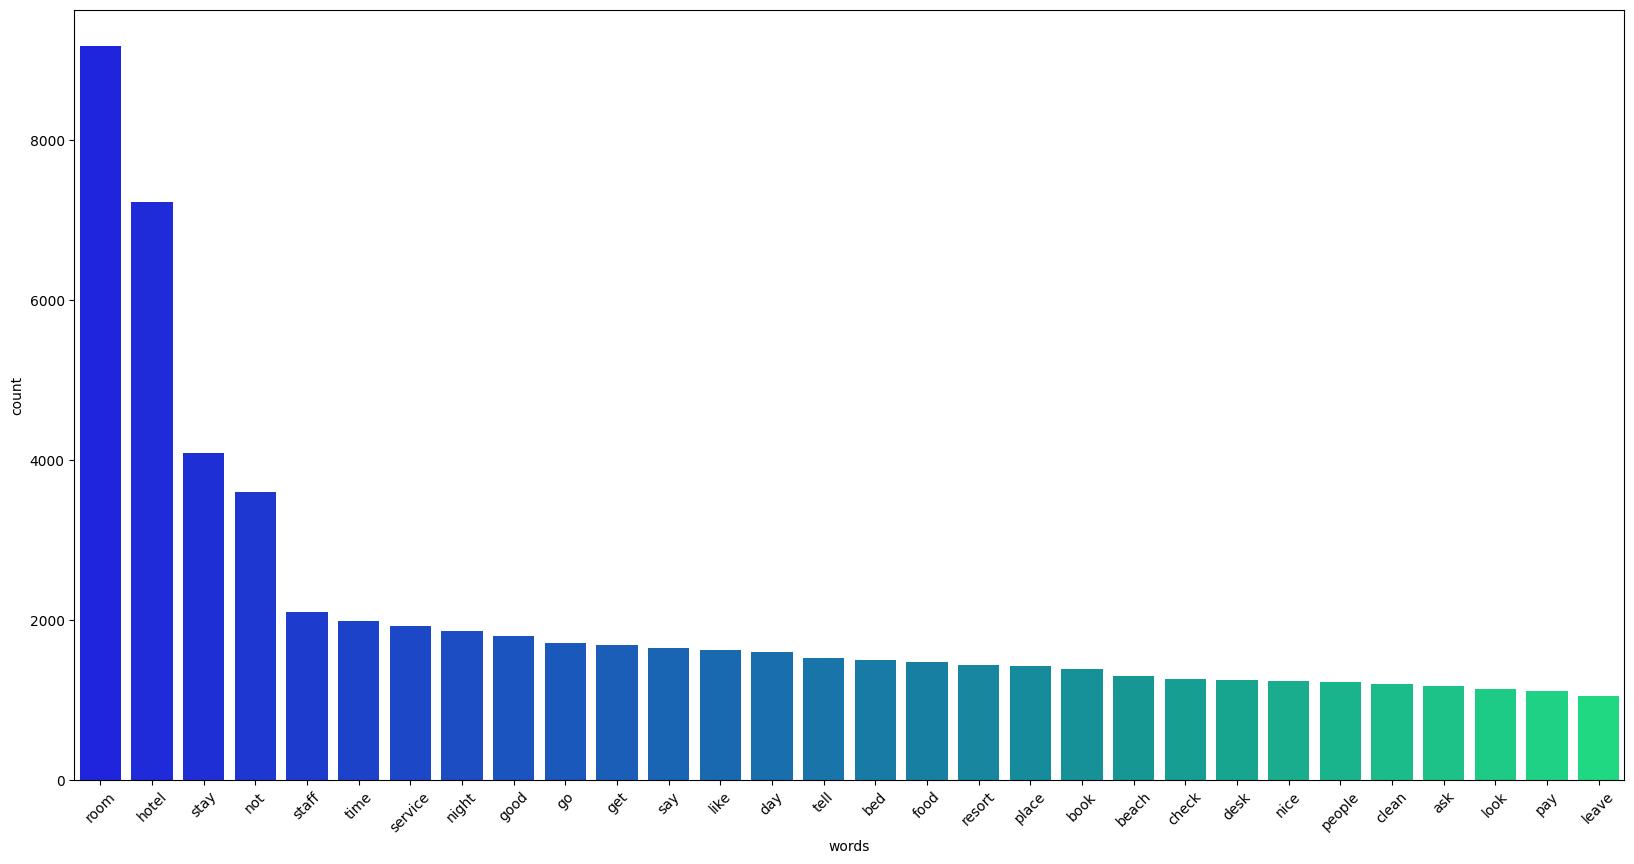

In [ ]:
# Import Counter
from collections import Counter

# Join all word corpus
review_words = ','.join(list(df_new[df_new['Rating'] == 'Bad']['Review'].values))

# Count and find the 30 most frequent
Counter = Counter(review_words.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (20,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'winter')
plt.xticks(rotation=45);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


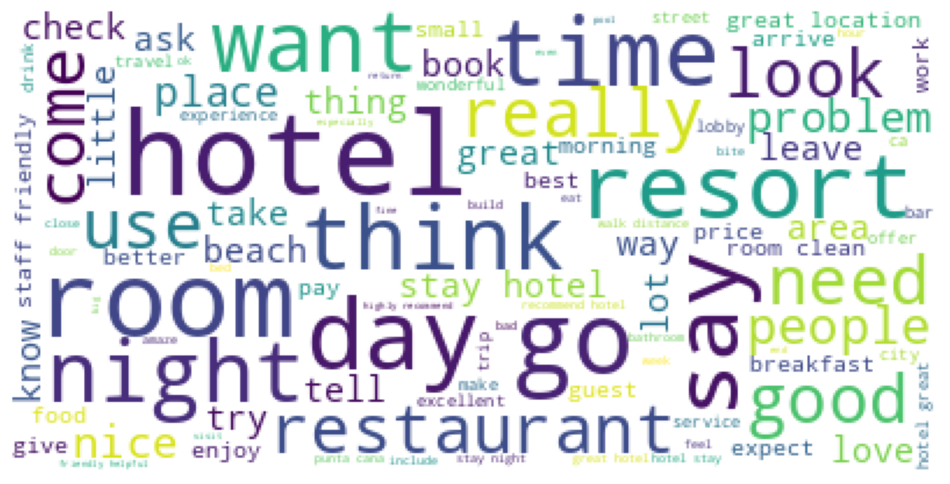

In [ ]:
## wordcloud for all comments

words_string = " ".join(review for review in df_new['Review'])

#generating the wordcloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words_string)

#plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

#to remove the axis value
plt.axis("off")
plt.show()

### LDA baseline model

In [ ]:
new_stopwords = ["hotel", "stay", "resort"]
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)
stpwrd.remove('not')
def token_stop(text):
    tokens = word_tokenize(text) # tokenize the text
    newlist = []
    for word in tokens:
        if word not in stpwrd: # remove stop words
          newlist.append(word)
    return newlist

df_new['LDA Reviews'] = df_new['Review'].apply(token_stop)
df_new.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating,Length,Length_new,LDA Reviews
0,nice hotel expensive park get good deal stay h...,Good,593,512,"[nice, expensive, park, get, good, deal, anniv..."
1,ok nothing special charge diamond member hilto...,Bad,1689,1538,"[ok, nothing, special, charge, diamond, member..."


In [ ]:
bad_reviews = df_new[df_new['Rating'] == 'Bad'].copy()
dict_ = corpora.Dictionary(bad_reviews['LDA Reviews']) # Create Dictionary
doc_term_matrix = [dict_.doc2bow(i) for i in bad_reviews['LDA Reviews']] # Term Document Frequency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model1 = lda(doc_term_matrix,
    num_topics=3,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model1.print_topics(num_words=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.002*"area" + 0.002*"like" + 0.002*"noise" + 0.002*"holiday" + 0.001*"inn"'),
 (1,
  '0.015*"room" + 0.011*"not" + 0.011*"food" + 0.010*"beach" + 0.008*"time"'),
 (2,
  '0.037*"room" + 0.012*"not" + 0.008*"staff" + 0.007*"night" + 0.006*"bed"')]

### LDA after Removing more stopwords（hotel,stay,resort）



In [ ]:
new_stopwords = ["hotel", "stay", "resort"]
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)
stpwrd.remove('not')
words = set(nltk.corpus.words.words())
def more_cleaning(text):
    #remove stopwords
    clean_text = [word for word in text.split() if word not in stpwrd]
    # clean_text = [word for word in clean_text if word.lower() in words] -> not correct, do not use it
    return ' '.join(clean_text)

bad_reviews['Cleaned_Review'] = bad_reviews['Review'].apply(more_cleaning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bad_reviews['length'] = bad_reviews['Review'].apply(len)
b = bad_reviews['length'].sum()
bad_reviews['n_length'] = bad_reviews['Cleaned_Review'].apply(len)
a = bad_reviews['n_length'].sum()
(a - b)/b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-0.03618141334566229

In [ ]:
bad_reviews['Cleaned_Review'][20481]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'ok price look ok little run average cleanliness choose price seattle quite expensive not roombed reserve staff unhelpful best westerns use nice hotels not fit mold choose different probably expensive time visit seattle'

In [ ]:
bad_reviews['New LDA Reviews'] = bad_reviews['Cleaned_Review'].apply(token_stop)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word = corpora.Dictionary(bad_reviews['New LDA Reviews']) # Create new Dictionary
corpus = [id2word.doc2bow(i) for i in bad_reviews['New LDA Reviews']] # Term Document Frequency

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# from gensim.models import CoherenceModel

# # Compute coherence score
# number_of_topics = []
# coherence_score = []
# for i in range(1,10):
#   lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            iterations=50,
#                                            num_topics=i)
#   coherence_model_lda = CoherenceModel(model=lda_model,
#                                        texts=bad_reviews['New LDA Reviews'],
#                                        dictionary=id2word,
#                                        coherence='c_v')
#   coherence_lda = coherence_model_lda.get_coherence()
#   number_of_topics.append(i)
#   coherence_score.append(coherence_lda)

# # Create a dataframe of coherence score by number of topics
# topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
#                                 'coherence_score':coherence_score})

# # Print a line plot
# sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Define the number of topics
n_topics = 6

# Run the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=n_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.031*"felt" + 0.029*"wife" + 0.028*"average" + 0.024*"ca" + 0.024*"100" + 0.019*"maid" + 0.017*"amaze" + 0.014*"surprise" + 0.014*"value" + 0.013*"cut"
Topic: 1 Word: 0.073*"star" + 0.057*"different" + 0.054*"terrible" + 0.050*"luggage" + 0.031*"stop" + 0.028*"worse" + 0.012*"smelly" + 0.012*"dump" + 0.010*"box" + 0.008*"option"
Topic: 2 Word: 0.022*"charge" + 0.018*"manager" + 0.017*"reservation" + 0.017*"book" + 0.013*"receive" + 0.011*"card" + 0.010*"children" + 0.009*"family" + 0.008*"positive" + 0.008*"allow"
Topic: 3 Word: 0.047*"beach" + 0.037*"buffet" + 0.034*"cana" + 0.034*"punta" + 0.025*"breeze" + 0.018*"sick" + 0.014*"riu" + 0.013*"dominican" + 0.013*"tip" + 0.011*"entertainment"
Topic: 4 Word: 0.037*"place" + 0.017*"view" + 0.015*"bathroom" + 0.015*"location" + 0.014*"small" + 0.013*"poor" + 0.011*"10" + 0.009*"breakfast" + 0.009*"let" + 0.009*"wall"
Topic: 5 Word: 0.039*"room" + 0.017*"not" + 0.009*"go" + 0.009*"staff" + 0.009*"good" + 0.009*"time" + 0.009

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#!pip install pyLDAvis
import pyLDAvis.gensim_models
#!pip install "pandas < 2.0.0"
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model,
                                     corpus,
                                     dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.405786  0.099444       1        1  72.549027
4     -0.039375 -0.351022       2        1  12.423956
2      0.044382  0.074434       3        1   7.429964
3      0.127373  0.105223       4        1   3.993995
0      0.139832  0.034971       5        1   2.064588
1      0.133574  0.036949       6        1   1.538469, topic_info=            Term         Freq        Total Category  logprob  loglift
2964       beach  1289.000000  1289.000000  Default  30.0000  30.0000
479        place  1450.000000  1450.000000  Default  29.0000  29.0000
129         room  9011.000000  9011.000000  Default  28.0000  28.0000
22          book  1573.000000  1573.000000  Default  27.0000  27.0000
2063   beautiful   702.000000   702.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
10041    freshen    10.619781    11.553471   Topic6  -6.1302   4.0901
5861    recomend     7.363133     8.091170   Topic6  -6.4964   4.0801
7183   everybody    20.622530    22.958312   Topic6  -5.4665   4.0671
16102    transat    11.025335    20.661713   Topic6  -6.0927   3.5463
19800       kuta    10.198781    22.369803   Topic6  -6.1706   3.3889

[243 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
462       2  0.997733       10
166       5  0.995566      100
167       5  0.987477      150
2         1  0.999551        2
169       5  0.990423      300
...     ...       ...      ...
969       2  0.996528  windows
904       3  0.997156     wish
294       1  0.998940     work
569       6  0.994461    worse
3144      6  0.971870     yeah

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 3, 4, 1, 2])

In [ ]:
bad_reviews

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Review,Rating,Length,Length_new,LDA Reviews,Cleaned_Review,length,n_length,New LDA Reviews
1,ok nothing special charge diamond member hilto...,Bad,1689,1538,"[ok, nothing, special, charge, diamond, member...",ok nothing special charge diamond member hilto...,1538,1503,"[ok, nothing, special, charge, diamond, member..."
10,poor value stay monaco seattle july nice hotel...,Bad,333,296,"[poor, value, monaco, seattle, july, nice, pri...",poor value monaco seattle july nice price 100 ...,296,274,"[poor, value, monaco, seattle, july, nice, pri..."
15,horrible customer service hotel stay february ...,Bad,1411,1265,"[horrible, customer, service, february, 3rd, 4...",horrible customer service february 3rd 4th 200...,1265,1231,"[horrible, customer, service, february, 3rd, 4..."
16,disappoint say anticipate stay hotel monaco ba...,Bad,1662,1496,"[disappoint, say, anticipate, monaco, base, re...",disappoint say anticipate monaco base review s...,1496,1443,"[disappoint, say, anticipate, monaco, base, re..."
24,great location need internally upgrade advanta...,Bad,250,233,"[great, location, need, internally, upgrade, a...",great location need internally upgrade advanta...,233,228,"[great, location, need, internally, upgrade, a..."
...,...,...,...,...,...,...,...,...,...
20481,ok price look hotel ok little run average clea...,Bad,247,230,"[ok, price, look, ok, little, run, average, cl...",ok price look ok little run average cleanlines...,230,218,"[ok, price, look, ok, little, run, average, cl..."
20484,deceptive staff deceptive desk staff claim par...,Bad,695,635,"[deceptive, staff, deceptive, desk, staff, cla...",deceptive staff deceptive desk staff claim par...,635,630,"[deceptive, staff, deceptive, desk, staff, cla..."
20485,impress unfriendly staff check ask higher floo...,Bad,616,562,"[impress, unfriendly, staff, check, ask, highe...",impress unfriendly staff check ask higher floo...,562,545,"[impress, unfriendly, staff, check, ask, highe..."
20488,ok look nice modern outside desk staff not par...,Bad,443,403,"[ok, look, nice, modern, outside, desk, staff,...",ok look nice modern outside desk staff not par...,403,391,"[ok, look, nice, modern, outside, desk, staff,..."


### LDA using N-grams -> 2 & 3 grams
2 grams -> 3 to 4 topics

3 grams -> 4 topics








In [ ]:
def generate_N_grams(text,ngram=1):
  words= text
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bad_reviews['2_grams'] = bad_reviews['New LDA Reviews'].apply(lambda x: generate_N_grams(x,2))
bad_reviews['3_grams'] = bad_reviews['New LDA Reviews'].apply(lambda x: generate_N_grams(x,3))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bad_reviews['3_grams']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1        [ok nothing special, nothing special charge, s...
10       [poor value monaco, value monaco seattle, mona...
15       [horrible customer service, customer service f...
16       [disappoint say anticipate, say anticipate mon...
24       [great location need, location need internally...
                               ...                        
20481    [ok price look, price look ok, look ok little,...
20484    [deceptive staff deceptive, staff deceptive de...
20485    [impress unfriendly staff, unfriendly staff ch...
20488    [ok look nice, look nice modern, nice modern o...
20490    [people talk ca, talk ca not, ca not believe, ...
Name: 3_grams, Length: 3149, dtype: object

In [ ]:
id2word = corpora.Dictionary(bad_reviews['2_grams'])
corpus = [id2word.doc2bow(i) for i in bad_reviews['2_grams']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model1 = lda(corpus,
    num_topics=4,
    id2word = id2word,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651,
    per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model1,
                                     corpus,
                                     dictionary=lda_model1.id2word)

In [ ]:
for idx, topic in lda_model1.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

In [ ]:
id2word = corpora.Dictionary(bad_reviews['3_grams'])
corpus = [id2word.doc2bow(i) for i in bad_reviews['3_grams']]

In [ ]:
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model1 = lda(corpus,
    num_topics=4,
    id2word = id2word,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651,
    per_word_topics=True
)

In [ ]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model1,
                                     corpus,
                                     dictionary=lda_model1.id2word)
vis

In [ ]:
for idx, topic in lda_model1.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

### LDA & Keyword Extraction


#### Rapid Automatic Keyword Extraction (Rake) & LDA

In [ ]:
#!pip install multi_rake
from multi_rake import Rake
rake = Rake(
    max_words = 4,
    stopwords = stpwrd
)
def rake_implement(x,rake):
    lst = []
    keywords = rake.apply(x)
    for i in keywords:
      lst.append(i[0])
    return lst

In [ ]:
rake.apply('nothing special charge diamond member decide chain shoot anniversary start book suite extra description suite bedroom bathroom standard hotel room take print reservation desk say like couch desk clerk tell oh mix description sorry free breakfast get embassy sit room bathroom bedroom unlike suite day stay offer correct false advertise send prefer guest failure provide suite reservation description furnish hard copy reservation desk manager duty reply solution send trip guest survey follow mail guess tell concern staff range indifferent helpful desk good breakfast neighborhood hood tell gee best breakfast block away convenient hotel know exist late night inside run bellman busy cell phone help arrival hotel inform anniversary half really picky make sure good get nice say like deliver bottle champagne chocolate cover room arrival celebrate tell foam arrival champagne foam great room view alley high rise build good better housekeep staff cleaner room property leave morning shop room get short good control x inch screen bring green shine directly night light sensitive tape start hotel clean business hotel super high better chain')

[('super high better chain', 16.0), ('clean business', 4.0)]

In [ ]:
bad_reviews['Rake Reviews'] = bad_reviews['Review'].apply(lambda x: rake_implement(x,rake))

In [ ]:
bad_reviews['Rake Reviews']

1                [super high better chain, clean business]
10                         [poor value, price night, nice]
15       [horrible customer service, recommend anybody ...
16              [base see definitely room, disappoint say]
24                               [location staff friendly]
                               ...                        
20481          [probably expensive time visit, price look]
20484                                                   []
20485                                                   []
20488                                                   []
20490                                                   []
Name: Rake Reviews, Length: 3149, dtype: object

In [ ]:
bad_reviews

,Review,Rating,Length,Length_new,LDA Reviews,Rake Reviews
1,nothing special charge diamond member decide c...,Bad,1689,1141,"[nothing, special, charge, diamond, member, de...","[super high better chain, clean business]"
10,poor value stay nice hotel price night hotel b...,Bad,333,201,"[poor, value, stay, nice, hotel, price, night,...","[poor value, price night, nice]"
15,horrible customer service hotel stay friend pi...,Bad,1411,907,"[horrible, customer, service, hotel, stay, fri...","[horrible customer service, recommend anybody ..."
16,disappoint say stay hotel base see definitely ...,Bad,1662,1122,"[disappoint, say, stay, hotel, base, see, defi...","[base see definitely room, disappoint say]"
24,great location need internally upgrade advanta...,Bad,250,177,"[great, location, need, internally, upgrade, a...",[location staff friendly]
...,...,...,...,...,...,...
20481,price look hotel little run average cleanlines...,Bad,247,176,"[price, look, hotel, little, run, average, cle...","[probably expensive time visit, price look]"
20484,deceptive staff deceptive desk staff park stre...,Bad,695,476,"[deceptive, staff, deceptive, desk, staff, par...",[]
20485,unfriendly staff check higher floor floor high...,Bad,616,423,"[unfriendly, staff, check, higher, floor, floo...",[]
20488,nice modern outside desk staff particularly fr...,Bad,443,288,"[nice, modern, outside, desk, staff, particula...",[]


In [ ]:
dict_ = corpora.Dictionary(bad_reviews['Rake Reviews'])
doc_term_matrix = [dict_.doc2bow(i) for i in bad_reviews['Rake Reviews']]

In [ ]:
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model1 = lda(doc_term_matrix,
    num_topics=3,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [ ]:
lda_model1.print_topics(num_words=10)

[(0,
  '0.018*"star" + 0.013*"book" + 0.011*"room" + 0.010*"nice" + 0.010*"better" + 0.009*"disappoint" + 0.007*"good" + 0.006*"staff" + 0.006*"horrible" + 0.005*"time"'),
 (1,
  '0.006*"great" + 0.004*"avoid" + 0.004*"experience" + 0.004*"return" + 0.004*"choose" + 0.003*"leave" + 0.002*"week" + 0.002*"best" + 0.002*"decide" + 0.002*"punta"'),
 (2,
  '0.021*"worst" + 0.010*"away" + 0.008*"recommend" + 0.007*"night" + 0.006*"beautiful" + 0.006*"bad" + 0.005*"nights" + 0.004*"average" + 0.003*"husband" + 0.003*"rat"')]

#### KeyBert & LDA -> does not work out, model take very long time to run.

In [ ]:
kw_model = KeyBERT(model='all-mpnet-base-v2')
n_keywords = 10  # Specify number of keywords to extract
ngram = 2  # Specify ngram of keywords

# Apply KeyBERT model extraction function along 'Text' axis of pandas dataframe
bad_reviews['KeyBert Reviews'] = bad_reviews['Review'].apply(lambda x:
                                       kw_model.extract_keywords(x,
                                                                 keyphrase_ngram_range=(1, ngram),
                                                                 stop_words='english',
                                                                 highlight=False,
                                                                 top_n=n_keywords))

KeyboardInterrupt: ignored

In [ ]:
bad_reviews['Review'][100:101].apply(lambda x:
                                       kw_model.extract_keywords(x,
                                                                 keyphrase_ngram_range=(1, 2),
                                                                 stop_words='english',
                                                                 highlight=False,
                                                                 top_n=n_keywords))

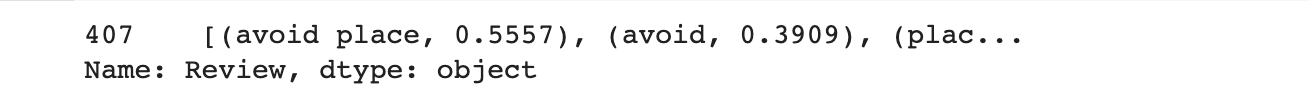

#### Yet Another Keyword Extractor(Yake) & LDA
3 topics best

In [ ]:
!pip install git+https://github.com/LIAAD/yake
import yake

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-h6r4j_07
  Running command git clone --filter=blob:none --quiet https://github.com/LIAAD/yake /tmp/pip-req-build-h6r4j_07
  Resolved https://github.com/LIAAD/yake to commit 374fc1c1c19eb080d5b6115cbb8d4a4324392e54
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.7 MB/s eta 0:00:00
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=62575 sha256=f5ed11bc0149baa9ca57d7a72b37dce3d36f978ea3d57b6a329866d4f85fa8ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-kakba5j7/wheels/10/9d/33/6a3358fd876c3d7c6c5c139d1496eb4b1618c7d0e15c375584
Successfully built yake


In [ ]:
kw_extractor = yake.KeywordExtractor(top=10, stopwords=stpwrd, n = 3) # top -> num of keys
def yake_implement(x):
    lst = []
    keywords = kw_extractor.extract_keywords(x)
    for i in keywords:
      lst.append(i[0])
    return lst


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bad_reviews['Yake Review'] = bad_reviews['Review'].apply(lambda x: yake_implement(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bad_reviews['Yake Review']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1        [anniversary half really, block away convenien...
10       [nothing exceptional pay, felt like overpay, m...
15       [desk send somebody, horrible customer service...
16       [new years plan, new year day, good luck find,...
24       [bed old pillow, location staff friendly, inte...
                               ...                        
20481    [little run average, run average cleanliness, ...
20484    [order try pay, expect major chain, open order...
20485    [impress unfriendly staff, friendly products b...
20488    [phone promptly deliver, look nice modern, nic...
20490    [believe excellent rat, extremely helpful flue...
Name: Yake Review, Length: 3149, dtype: object

In [ ]:
for i in bad_reviews['Yake Review'][1]:
  print(i)

anniversary half really
block away convenient
hours bed comfortablenot
inch screen bring
sensitive tape controlsthis
need foam pillow
foam pillow great
decide chain shoot
spot neighborhood hood
nothing special charge


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
id2word_yake = corpora.Dictionary(bad_reviews['Yake Review'])
corpus_yake = [id2word_yake.doc2bow(i) for i in bad_reviews['Yake Review']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model_yake = lda(corpus_yake,
    num_topics=3,
    id2word = id2word_yake,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651,
    per_word_topics=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(lda_model_yake,
                                     corpus_yake,
                                     dictionary=lda_model_yake.id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.093484 -0.000144       1        1  51.389365
1     -0.046948 -0.048889       2        1  24.425280
2     -0.046536  0.049033       3        1  24.185355, topic_info=                         Term       Freq      Total Category  logprob  loglift
2298   staff friendly helpful   4.000000   4.000000  Default  30.0000  30.0000
3492           queen size bed   3.000000   3.000000  Default  29.0000  29.0000
16209       year old daughter   3.000000   3.000000  Default  28.0000  28.0000
4515             old san juan  10.000000  10.000000  Default  27.0000  27.0000
5103         visit punta cana   2.000000   2.000000  Default  26.0000  26.0000
...                       ...        ...        ...      ...      ...      ...
7760       credit card detail   1.574580   2.235053   Topic3  -8.4840   1.0691
8766       charge credit card   1.573835   2.235059   Topic3  -8.4845   1.0687
2374      review trip advisor   1.503260   3.571186   Topic3  -8.5304   0.5542
8328          spend lot money   1.239178   1.903687   Topic3  -8.7236   0.9901
19116         view brick wall   1.239176   1.903687   Topic3  -8.7236   0.9901

[143 rows x 6 columns], token_table=       Topic      Freq                         Term
term                                               
20262      1  0.943026  advertise wireless internet
8507       2  0.430930            air condition not
8507       3  0.430930            air condition not
4571       1  0.533318           air condition work
4571       3  0.266659           air condition work
...      ...       ...                          ...
9608       2  0.633459        write negative review
13970      2  0.633459               year old child
16209      2  0.879996            year old daughter
918        1  0.590068                 year old son
918        3  0.295034                 year old son

[124 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
for idx, topic in lda_model_yake.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.000*"king size bed" + 0.000*"old san juan" + 0.000*"read great review" + 0.000*"grand paradise bavaro" + 0.000*"good value money" + 0.000*"read trip advisor" + 0.000*"breeze punta cana" + 0.000*"near train station" + 0.000*"air condition work" + 0.000*"picture web site"
Topic: 1 Word: 0.001*"old san juan" + 0.000*"year old daughter" + 0.000*"trip punta cana" + 0.000*"visit punta cana" + 0.000*"non smoke room" + 0.000*"tell room ready" + 0.000*"review trip advisor" + 0.000*"breeze punta cana" + 0.000*"holiday inn express" + 0.000*"punta cana dominican"
Topic: 2 Word: 0.000*"staff friendly helpful" + 0.000*"queen size bed" + 0.000*"waste time money" + 0.000*"poor customer service" + 0.000*"double bed get" + 0.000*"credit card detail" + 0.000*"charge credit card" + 0.000*"bad bad bad" + 0.000*"review trip advisor" + 0.000*"spend lot money"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### TextRank & LDA

In [ ]:
!pip install summa
from summa import keywords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54389 sha256=183a08b381bb3acf3a939af9340558e78d20564af2842d6ab65d53d272a26ae0
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [ ]:
def text_rank_implement(x):
    lst = []
    key = keywords.keywords(x, scores=True)
    for i in key:
      lst.append(i[0])
    return lst

In [ ]:
bad_reviews['TextR Review'] = bad_reviews['Cleaned_Review'].apply(lambda x: text_rank_implement(x))

In [ ]:
bad_reviews['TextR Review']

1        [room, tell, suite, good, description, breakfa...
10                              [best, nice, average, pay]
15       [valet, package, say pull, desk, check room co...
16       [helpful desk, service, time, help, room nice ...
24                            [sleep, great location need]
                               ...                        
20481                      [choose, expensive, time, best]
20484    [room, park street order try, free, advertisem...
20485    [use, room, guest, smell, floor, staff check, ...
20488     [room, space needle, phone, modern outside desk]
20490    [yes, place bite, follow morning night, budget...
Name: TextR Review, Length: 3149, dtype: object

In [ ]:
dict_ = corpora.Dictionary(bad_reviews['TextR Review'])
doc_term_matrix = [dict_.doc2bow(i) for i in bad_reviews['TextR Review']]

In [ ]:
chunksize = 1000
passes = 20
iterations = 400
eval_every = None  # don't evaluate model perplexity, takes too much time

lda = gensim.models.LdaModel

lda_model1 = lda(doc_term_matrix,
    num_topics=3,
    id2word = dict_,
    iterations=iterations,
    passes=passes,
    eval_every=eval_every,
    random_state=9651
)

In [ ]:
lda_model1.print_topics(num_words=10)

[(0,
  '0.047*"room" + 0.018*"night" + 0.012*"bed" + 0.010*"day" + 0.009*"nights" + 0.009*"staff" + 0.008*"time" + 0.008*"nice" + 0.008*"tell" + 0.007*"service"'),
 (1,
  '0.027*"room" + 0.013*"good" + 0.013*"day" + 0.013*"time" + 0.011*"days" + 0.010*"say" + 0.009*"night" + 0.008*"service" + 0.008*"staff" + 0.007*"leave"'),
 (2,
  '0.016*"room" + 0.010*"staff" + 0.010*"time" + 0.009*"like" + 0.009*"service" + 0.009*"food" + 0.009*"book" + 0.008*"beach" + 0.007*"say" + 0.007*"nice"')]

##  TF-IDF & KMeans

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = stpwrd
)
tfidf.fit(bad_reviews_new['Review'])
text = tfidf.transform(bad_reviews_new['Review'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters


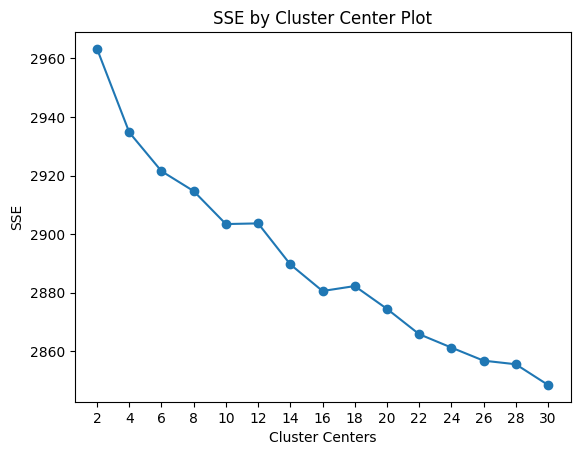

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)

    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

find_optimal_clusters(text, 30)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords(text, clusters, tfidf.get_feature_names_out(), 10)


Cluster 0
go,water,time,people,get,room,pool,good,beach,food

Cluster 1
small,give,staff,good,night,smoke,book,bed,floor,room

Cluster 2
rude,bad,manager,book,park,terrible,customer,staff,room,service

Cluster 3
nice,really,noise,good,night,location,room,great,staff,time

Cluster 4
price,good,location,bathroom,poor,staff,disappoint,small,room,star

Cluster 5
staff,nice,small,night,clean,room,good,place,location,breakfast

Cluster 6
get,book,card,day,desk,go,check,say,tell,room

Cluster 7
dirty,park,place,water,like,bathroom,bed,shower,night,room
